In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import os

In [3]:
# weird OSX error fix
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Machine Learning using Neural Networks 

In this part of the tutorial, we will use neural networks to recognize handwritten digits. Will will start by outlining why neural networks are good for recognizing images, and then train a neural network to recognize handwritten digits. We will use a famous dataset for this task, which is called MNIST.

In this notebook, we are going to use the [Python programming language](https://www.python.org/) and Google's [Tensorflow library](https://www.tensorflow.org/). Technically, R and Python perform the same operations in building neural network models. In fact, in the case of Tensorflow R and Python use the same back end code. However, the interface that Python offers is more straightforward for those learning the basics of neural networks which is why we've chosen to use it for this notebook.

R and Python use different syntax. One of the biggest differences you will notice is the assignment operator. In R this is `->` or `<-` and in Python it is `=`. Unlike R, in Python you can only assign to a varable that is on the left. As with the other notebooks, the goal is not to make you proficient at Python, but to see the concepts and overall process of building neural networks, so try not to get caught up in the syntax. If you are intereted in learning more Python, there are many great resources on the Internet.

Let's get started!

## Image Recognition using Neural Networks

How can computer programs recognize objects in a photograph? This has been one of the central questions in the computer vision research. It is very simple for humans to recognize objects in the photographs, just like we do in real world. But for computers, this task becomes notoriously difficult! Although with a little help from neural networks, it becomes rather easy because neural networks behave in a slightly intuitive way. Here is how a neural network would recognize whether there is a face in an image or not:

<img src="
./mnist/imgrecog_1.png"/>

What you see in the image above essentially tell us that neural networks try to recognize different 'features' of the image first, and based on appearance of those features, they decide whether the image contains the signal of interest or not (a human face in this case).

The problem of detecting a face in a photograph is a binary classification problem, but for our example, we are going to turn to a multi-class classification problem.

## Example: Recognizing Handwritten Digits using Neural Networks

To explore how to recognize images, we will try train a neural network model that can tell us which handwritten digit is there in the image we give to it. We are going to use a database of images that was originally developed in 1994 called the MNIST dataset. It is based on samples of high school students and U. S. Census Bureau employees' writing- https://en.wikipedia.org/wiki/MNIST_database

<img src="mnist/mnist_1.png"/>

You can see that there are many different ways of wriring 0s, 1s, 2s, and so on. How is a neural network going to detect which digit is there in the image? It turns out that neural network will try to break down the problem in parts and work it out.

## Representing Images as Data

In order to use a neural network to recognize images, we must first convert images into numeric values. Each image is translated into a matrix of values. We will first read in the MNIST data and then plot it to demonstrate what inputs are required in neural networks.

The MNIST dataset contains many thousand training examples for handwritten digits. Each training example is a 28x28 pixel image. This means that we have 28x28 = 784 features for each of our training example. As the output, we have a numeric value from 0 to 9, which tells the actual digit that is stored in those 784 pixels. We are going to use this information to train and evalulate our model.

Before we jump further in, you might ask, what do these 784 pixels contain? They contain what is called pixel intensity value that indicates how dark the pixel is. If we print these pixel intensity values, we get to see the actual image. Here is an example:

In [4]:
# load up the training and test datasets from keras
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
# create index dataframes for selecting arrays from vector of images
y_train_df = pd.DataFrame(y_train)
x_test_df = pd.DataFrame(y_test)

In [6]:
# convert pixel values to be between 0 and 1
x_train = x_train/255.0
x_test = x_test/255.0

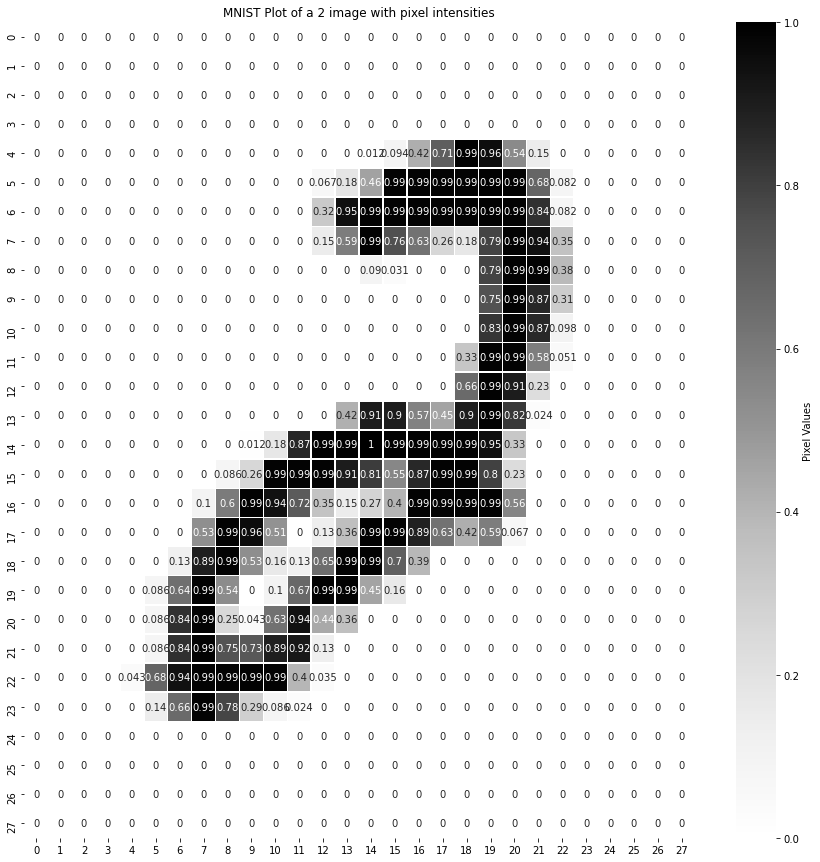

In [7]:
# Draw a heatmap with the pixel intensity in each cell using training example 555
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(x_train[555], annot=True, linewidths=.5, ax=ax, cmap="Greys", cbar_kws={'label': 'Pixel Values'})
plt.title("MNIST Plot of a {} image with pixel intensities".format(y_train[555]), size ="large")
plt.show()

## Conceptually, How Could an Algorithm Detect a Zero from Many Different Examples?

Let us say the neural network is trying to detect whether there is 0 in the image or not. It will proceed like this:

- Detect handwriting strokes in different parts of the image
- Put these strokes together to figure out what digit is there in the image

For a 0, we might have these strokes in the image:

<img src="mnist/mnist_2.png"/>

where the final image looks like this:

<img src="mnist/mnist_3.png"/>

And remember, there can be many different types of 0s! But most of them will have circular strokes in all four sides of the image.

The code below plots images that were labled (the training data) as zeros.

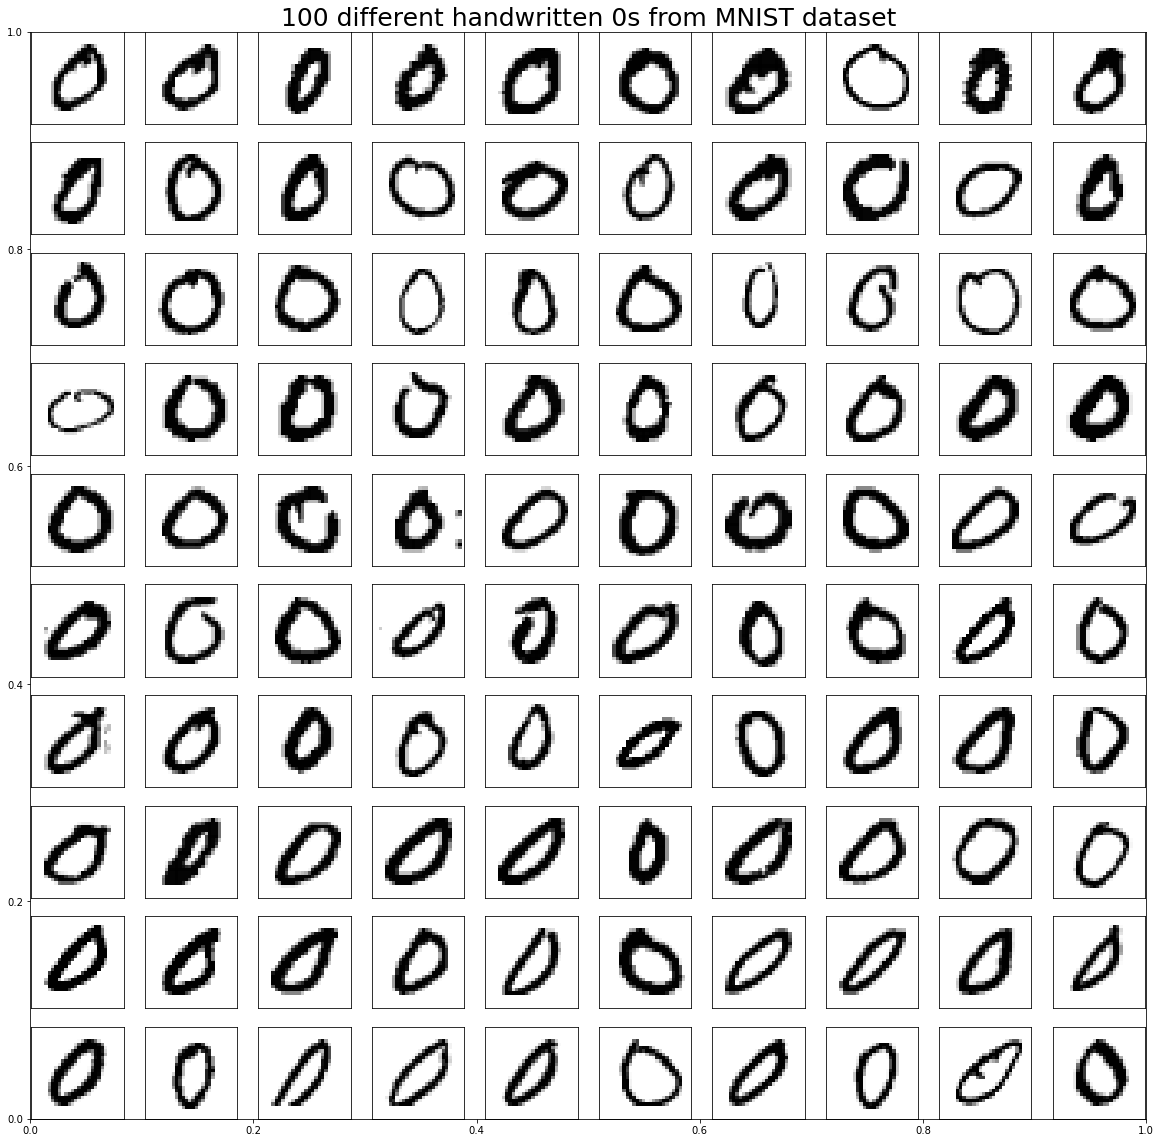

In [8]:
number = 0
zeros = x_train[y_train_df[y_train_df[0]==number].index]
fig = plt.figure(figsize=(20, 20))
plt.title("100 different handwritten {}s from MNIST dataset".format(number), fontsize = 25)
for x in range(100):
    ax = fig.add_subplot(10, 10, x+1)
    ax.matshow(zeros[x],cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))


### Detecting 0 to 9

So you now have a rough idea about how can a neural network detect 0 in an image. However, we need to detect all the digits, from 0 to 9. How will we do this using using a neural network?

So far, we have only talked about binary outcomes where a neural network is detecting whether there is 'some thing' present in its input or not. This requires us to have one neuron in the output layer. But if we want to detect multiple things, we need to have multiple neurons in the output layer, one for each thing we need to detect. In our case, we need to detect all the arabic numerals, so there will be 10 output nodes. Here is what our neural network will look like:

<img src="mnist/mnist_4.png"/>

Let us find out where those 784 input neurons are coming from.

We are going to feed a lot of these images to our neural network, and it will learn characteristics of different digits for us. Then we can use this trained model to make predictions.

### Model Training

Let us start the model training by looking at the the dataset. We will use <b>Tensorflow</b> (https://tensorflow.com/) package for our machine learning task via the library keras (https://keras.io/). 

Our training set will have 60,000 training samples and 10,000 validation examples.

First, we will set up the structure of our network model. Each line in the square brackets is a layer in the network. This is the code where we can configure the structure of the neural network including the number of hidden layers, neurons in each layer, and how we want our neurons to activate. The `tf.nn` function can call different activation functions like `relu`, `softmax`, and others as referenced here- https://keras.io/activations/

As with most models, the structure of the model can lead to under or over fitting. More details about this important concept are available here- https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

In [9]:
# Set up model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Next, we need to configure our model

In [10]:
# Note the optimizer sets several hyperparameters like the learning rate. 
# See info here: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Finally, we fit the model to the training data. Here we define how many iterations we want to do over the data. This parameter is called an epoch.

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 414us/step - loss: 0.7736 - accuracy: 0.8317
Epoch 2/5
1875/1875 [==============================] - 1s 418us/step - loss: 0.3410 - accuracy: 0.9111
Epoch 3/5
1875/1875 [==============================] - 1s 416us/step - loss: 0.2758 - accuracy: 0.9245
Epoch 4/5
1875/1875 [==============================] - 1s 409us/step - loss: 0.2441 - accuracy: 0.9314
Epoch 5/5
1875/1875 [==============================] - 1s 394us/step - loss: 0.2235 - accuracy: 0.9366


Now that our model is trained, we will generate some predictions and assess the accuracy. <b>Remember, always assess accuracy using test data!</b>

### Model Evaluation

Let's save the predictions of the test data into a list of arrays. Next, let's look at the first array and see the output values from the model.

In [12]:
predictions = model.predict(x_test)

Let's look at the output values in the first array [0].

In [13]:
predictions[0]

array([1.3791291e-04, 2.6986824e-04, 9.0769847e-04, 1.6680083e-03,
       4.9094965e-06, 1.8318630e-04, 1.9040694e-06, 9.9648076e-01,
       1.6615377e-05, 3.2912492e-04], dtype=float32)

If we want to see the neuron with the highest activation value, we can get the max from the output layer.

In [14]:
np.argmax(predictions[0])

7

We can also plot the output neuron values to see what they look like for one of this array.

Text(0.5, 1.0, 'Outputs')

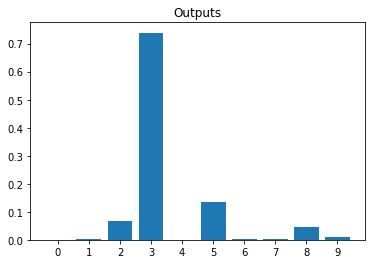

In [15]:
x = list(range(10))
y = predictions[18]

plt.figure("Outputs")
plt.bar(x,y)
plt.xticks(x)
plt.title("Outputs")

Let's look at both the images and predicitons together.

In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("pred:{} value:{:2.0f}% label:{}".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks(list(range(10)))
  plt.yticks([])
  thisplot = plt.bar(list(range(10)), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at a random image to see what the model predictied.

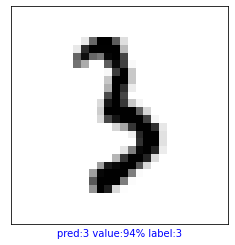

In [17]:
# i is the indec of the image we want to look at.
i = 44
plot_image(i, predictions, y_test, x_test)

Let's look at another image with the bar plot plot of the output values and color code the bars with red representing the wrong guess and blue the correct guess.

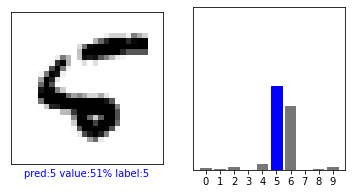

In [18]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

Let's look at several different images.

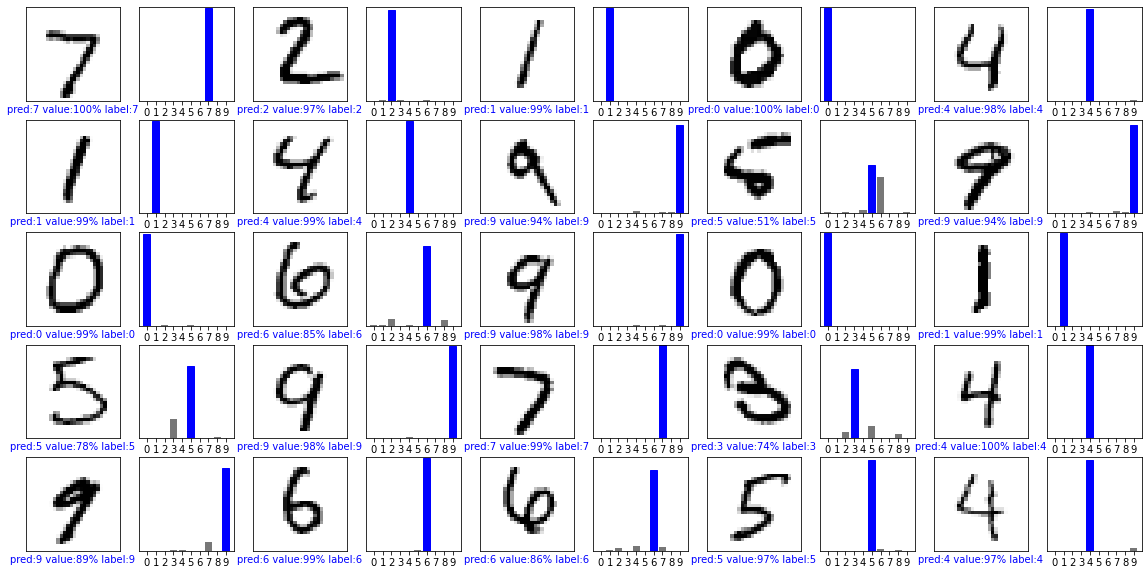

In [19]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

Next, let's formally evaluate our predictions against the true labled values.

In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 278us/step - loss: 0.2233 - accuracy: 0.9371
Test accuracy: 0.9370999932289124


A confusion matrix is a great way to visualize the predictions versus the actual labels.

In [21]:
# take the array of predictions for each image and just look at the max value.
preds = [np.argmax(i) for i in predictions]

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(preds, y_test)
print(cm)

[[ 958    0   12    2    1   10    7    3    4    6]
 [   0 1112    2    0    1    1    4    9    3    3]
 [   2    2  948   18    5    3    6   26    8    0]
 [   1    5    8  923    0   39    0    4   13    8]
 [   3    1    9    1  936    7    4    4    6   32]
 [   3    0    2   20    0  783   12    0   17    5]
 [   9    4   10    1    8   13  921    0    8    2]
 [   1    2    9   13    3    3    2  961    9   11]
 [   2    9   29   26    6   28    2    2  898   11]
 [   1    0    3    6   22    5    0   19    8  931]]


Look at the missed predictions.  Do you see a pattern?

How can we improve this model? There are different ways to improve predictions of a neural network:

- <b>Change architecture</b>
- <b>Try different hyperparameters</b>
- <b>Try advanced methods like convolution</b>

Trying these different things is out of the scope of this tutorial, but if you want to explore these options, you can do so in <a href="https://playground.tensorflow.org">TensorFlow Playground</a>.

## Conclusion

In this part of the tutorial, we saw how neural networks are trained using software packages. Don't worry if this was too complicated, you always get help about doing complex things when working in teams. Websites like [StackOverflow](https://stackoverflow.com/) can also help in case you get stuck.


## References

We would again like to thank Michael Nielson for his excellent online textbook on neural networks. We extensively borrowed part 1 materials from his textbook which can be found <a href="http://neuralnetworksanddeeplearning.com">here</a>.